# Маслов Матвей. Домашнее задание по Дифференциальной приватности

## Задание 1. Равномерный шум

### Чувствительность функции

Датасеты отличаются максимум на 1, тогда чувствительность функции:

$$
\Delta = \max_{X \sim X'} |f(X) - f(X')| = \frac{1}{n}.
$$


### 1. Лапласовский механизм

Лапласовский механизм является $\varepsilon$-DP, если

$$
\alpha = \frac{\Delta}{\varepsilon} = \frac{1}{n\varepsilon}
$$

и

$$
A(X) = f(X) + \eta,\quad \eta \sim \text{Lap}\left(\frac{1}{n\varepsilon}\right).
$$


### 2. Равномерный шум $U[-a, a]$

1) Для начала, чтобы отрезки вообще пересекались, необходимо, чтобы $\Delta \le 2\alpha$
2) Найдём более точное условие по определению $\varepsilon$-DP:  
для любого измеримого $S$ требуется

$$
P(A(X) \in S) \le e^\varepsilon P(A(X') \in S).
$$

Возьмём в качестве кандидата множество $S$, где распределено $A(X)$, т.е.  

$$
S = [f - \alpha,\, f + \alpha].
$$

Тогда

$$
P_X(S) = 1,
$$

а под $X'$ в этом же множестве окажется только доля длины пересечения двух отрезков:

$$
P_{X'}(S) = \frac{\text{длина пересечения}}{2\alpha} = \frac{2\alpha - \Delta}{2\alpha} \quad (\text{при } \Delta \le 2\alpha).
$$

Тогда требование DP даёт

$$
1 \le e^\varepsilon \cdot \frac{2\alpha - \Delta}{2\alpha}
\quad \Longrightarrow \quad
\frac{2\alpha}{2\alpha - \Delta} \le e^\varepsilon.
$$

Решая это неравенство относительно $\alpha$:

$$
2\alpha \le e^\varepsilon (2\alpha - \Delta)
\;\Rightarrow\;
2\alpha - 2\alpha e^\varepsilon \le -\Delta e^\varepsilon
\;\Rightarrow\;
2\alpha (e^\varepsilon - 1) \ge \Delta e^\varepsilon
$$

$$
\Rightarrow\quad
\alpha \ge \frac{\Delta\, e^\varepsilon}{2(e^\varepsilon - 1)} = \frac{\Delta}{2(1 - e^{-\varepsilon})}.
$$

## Задание 2. Групповая приватность

Пусть $D_1, D_2, D_3 ... D_k$ - соседние датасеты, такие что $D_1$ отличается от $D_2$ на один элемент, $D_2$ от $D_3$ на один элемент и т.д.
$$
P(A(D_1) \in S) \le e^\varepsilon P(A(D_2) \in S),
$$
$$
P(A(D_2) \in S) \le e^\varepsilon P(A(D_3) \in S)
$$
и т.д.

Тогда
$$
P(A(D_1) \in S) \le e^{2\varepsilon} P(A(D_3) \in S)
$$

Постепенно продлевая неравенство вправо, постепенно получим, что
$$
P(A(D_1) \in S) \le e^{k\varepsilon} P(A(D_k) \in S)
$$

## Задание 3. Сравнение экспоненциального подхода и подхода зашумленного максимума

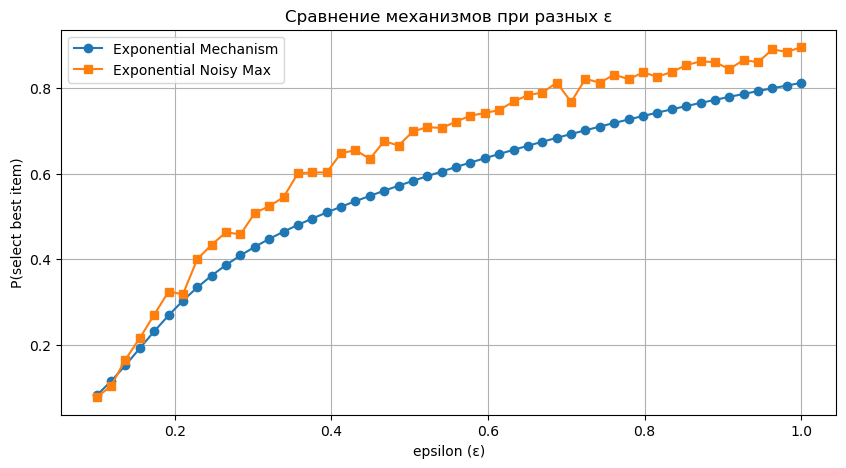

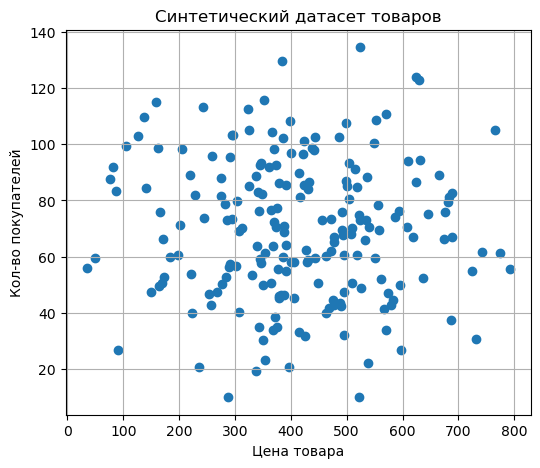

In [ ]:
# Реализуем для задачи с товарами, функия качества q(y, D) = цена товара * коли-во покупателей товара

# За критерий будем брать вероятность выбора алгоритмом товара с максимальным q, т.к. именно это нас интересует - это и есть точность алгоритма 

import numpy as np
import matplotlib.pyplot as plt

# Датасет
prices = np.random.normal(loc=400, scale=150, size=200)
prices = np.clip(prices, 20, 1000)

buyers = np.random.normal(loc=70, scale=25, size=200)
buyers = np.clip(buyers, 1, 200)

q = prices * buyers

items = np.array([f"Item_{i}" for i in range(len(q))])


# Экспоненциальный DP
def exponential_mechanism(q, epsilon, delta_q):
    scores = np.exp((epsilon * q) / (2 * delta_q))
    return scores / scores.sum()

# Зашумленный максимум DP
def noisy_max(q, epsilon, delta_q, n_runs=1000): # Будем брать несколько раз, чтобы получить распределение вероятностей
    scale = 2 * delta_q / epsilon
    counts = np.zeros_like(q)
    for _ in range(n_runs):
        noisy = q + np.random.exponential(scale, size=len(q))
        #noise = q + np.random.laplace(scale=scale, size=len(q)) - такой шум тоже можно брать, но результаты буду как у экпоненциального механизма
        counts[np.argmax(noisy)] += 1
    return counts / n_runs


# Чувствительность
delta_q = prices.max() - prices.min()



# Сравнение для разных epsilon
epsilons = np.linspace(0.1, 1.0, 50)

exp_top1_probs = []
noisy_top1_probs = []

for eps in epsilons:
    exp_probs = exponential_mechanism(q, eps, delta_q)
    noisy_probs = noisy_max(q, eps, delta_q)

    # вероятность выбрать реально лучший товар
    best_index = np.argmax(q)
    exp_top1_probs.append(exp_probs[best_index])
    noisy_top1_probs.append(noisy_probs[best_index])


# Сравнение механихмов DP
plt.figure(figsize=(10, 5))
plt.plot(epsilons, exp_top1_probs, marker="o", label="Exponential Mechanism")
plt.plot(epsilons, noisy_top1_probs, marker="s", label="Exponential Noisy Max")
plt.xlabel("epsilon (ε)")
plt.ylabel("P(select best item)")
plt.title("Сравнение механизмов при разных ε")
plt.legend()
plt.grid(True)
plt.show()


# Датасет
plt.figure(figsize=(6,5))
plt.scatter(prices, buyers)
plt.xlabel("Цена товара")
plt.ylabel("Кол-во покупателей")
plt.title("Синтетический датасет товаров")
plt.grid(True)
plt.show()


Можно заметить, что методы ведут себя похоже и имеют одинаковую тенденцию для каждого $\epsilon$, для малых - высокая приватность, но низкая точность, для больших - наоборот. Заметное отличие, что метод экспоненциальной приватности ведет себя гладко, в отличие от метода зашумленного максимума. Nosiy Max метод так же показывает чуть лучшие результаты, чем экспоненциальная приватность

# 4 задание. Сравнение Лапласовского и Гауссовского шума

## Подготовка эксперимента
Для оценки качества модели будем исопльзовать стандартную метрику - MSE (база для линейный моделей)
1) В случае Лапласовского шума:
$$
\Delta_1 = \sup_{D, D'} \|f(D) - f(D')\|_1 = \frac{d}{n}
$$
$$
Z_i \sim  Lap(\frac{\Delta_1}{\varepsilon}) = Lap(\frac{d}{n\varepsilon})
$$
$$
\text{MSE}_{\text{Lap}} \sim b^2 = \frac{d^2}{\varepsilon^2 n^2}
$$
2) В случае Гауссовского шума:
$$
\Delta_2 = \sup_{D, D'} \|f(D) - f(D')\|_2 = \frac{\sqrt d}{n}
$$
$$
Z_i \sim  \mathcal{N}(\sigma^2) = \mathcal{N}(\frac{2\Delta_{2}^{2}}{\varepsilon^2}\log(\frac{1}{\delta}))= \mathcal{N}(\frac{2d}{n^2\varepsilon^2}\log(n))
$$
$$
\text{MSE}_{\text{Gauss}} \sim \sigma^2 \sim \frac{d\log(n)}{\varepsilon^2 n^2}
$$
## Сравнение теоретических результатов
Заметно, что Гауссовский шум будет себя сильно лучше показывать, т.к. ошибка в его случае будет расти линейно по d, а в случае Лапласовского шума она будет расти квадратично.

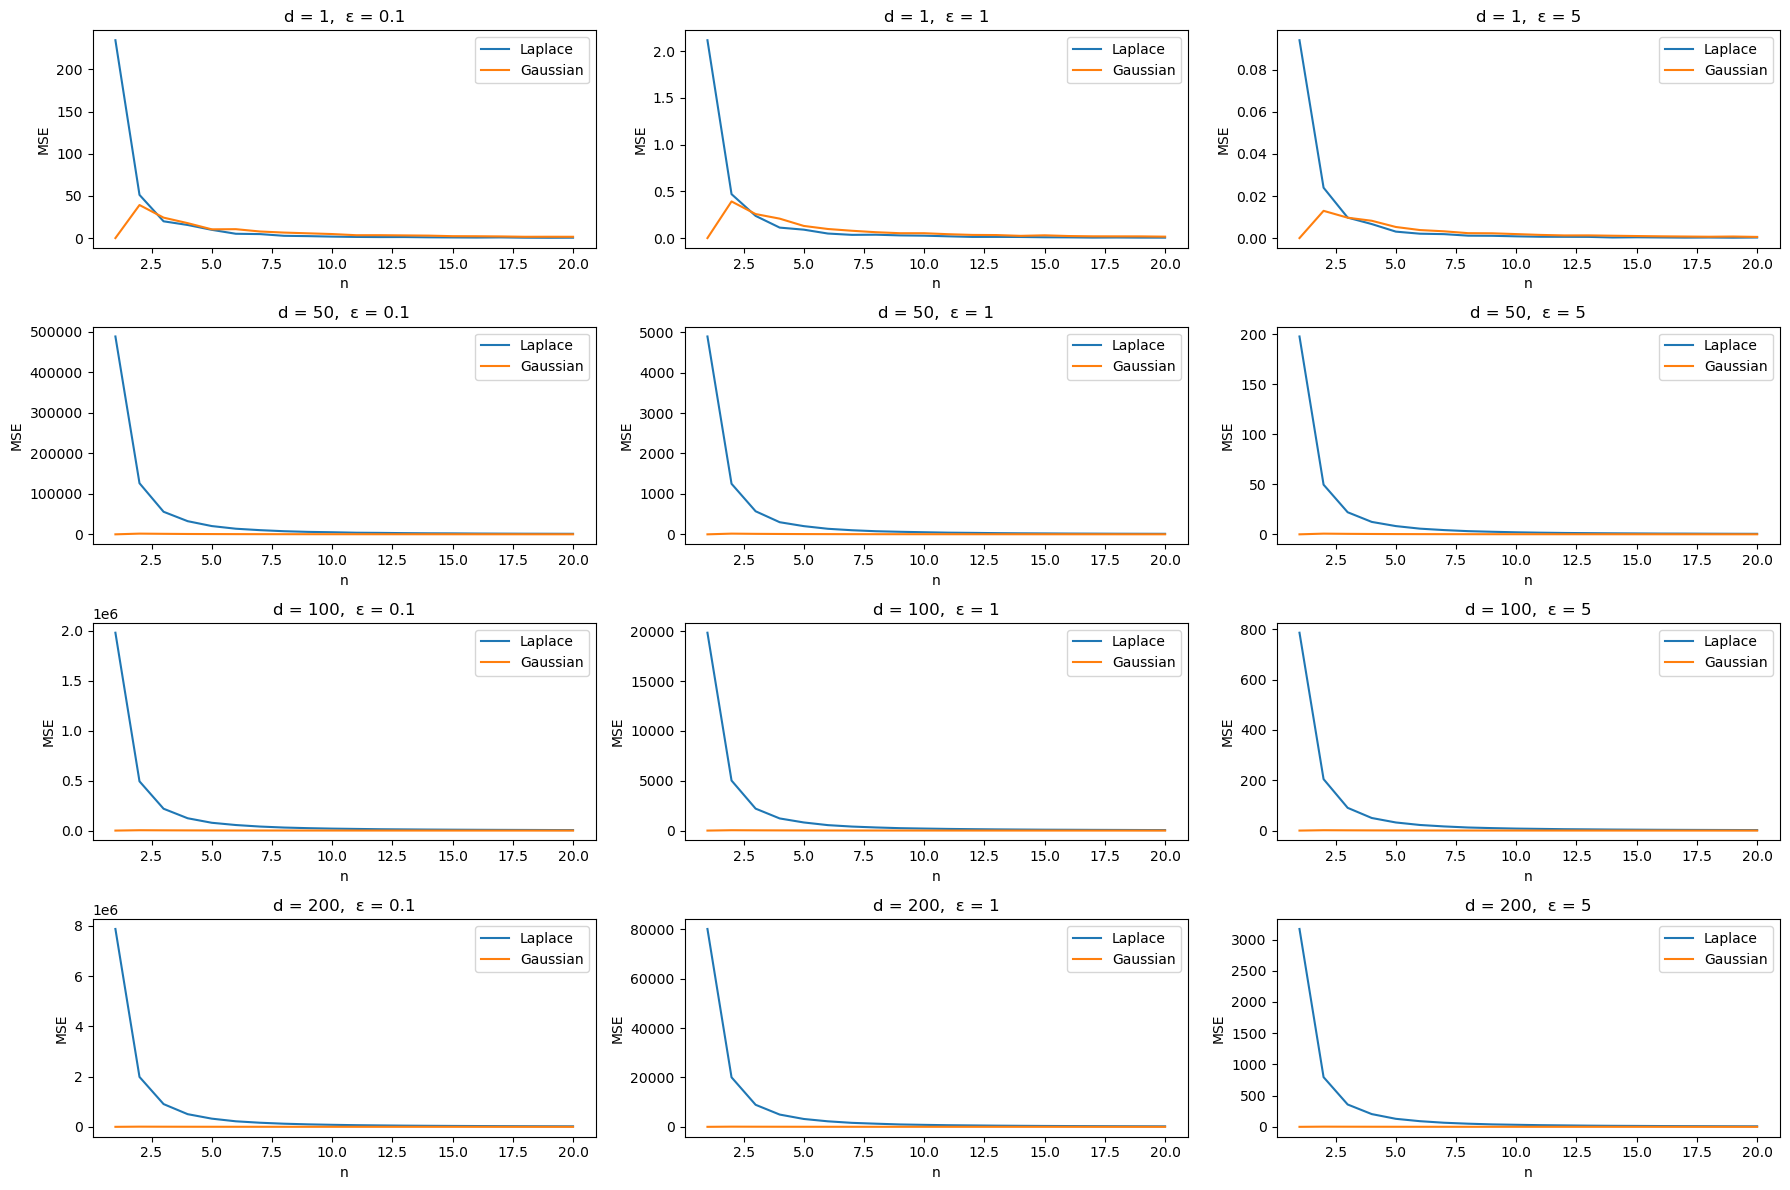

In [16]:
import numpy as np
import matplotlib.pyplot as plt


def laplace_noise(scale, size):
    return np.random.laplace(0, scale, size)

def gaussian_noise(std, size):
    return np.random.normal(0, std, size)


def run_experiment(n, d, eps, trials=200):
    
    # Параметры шума Лапласа (L1 норма)
    sens_l1 = d / n
    b = sens_l1 / eps

    # Парамтеры шума Гаусса (L2 норма)
    delta = 1 / n
    sens_l2 = np.sqrt(d) / n
    sigma = np.sqrt(2 * np.log(1 / delta)) * sens_l2 / eps

    mse_lap, mse_gauss = 0.0, 0.0

    for _ in range(trials):
        # Датасет
        X = np.random.randint(0, 2, (n, d))
        true_mean = X.mean(axis=0)

        # Добавляем шумы
        noisy_lap = true_mean + laplace_noise(b, d)
        noisy_gauss = true_mean + gaussian_noise(sigma, d)

        mse_lap += np.mean((noisy_lap - true_mean) ** 2)
        mse_gauss += np.mean((noisy_gauss - true_mean) ** 2)

    return mse_lap / trials, mse_gauss / trials


# Параметры обучения
eps_values = [0.1, 1, 5]
d_values = [1, 50, 100, 200]
n_values = np.linspace(1, 20, 20, dtype=int)


fig, axes = plt.subplots(len(d_values), len(eps_values), figsize=(18, 12))
for i, d in enumerate(d_values):
    for j, eps in enumerate(eps_values):
        lap_mses = []
        gau_mses = []

        for n in n_values:
            mse_l, mse_g = run_experiment(n, d, eps)
            lap_mses.append(mse_l)
            gau_mses.append(mse_g)

        ax = axes[i, j]
        ax.plot(n_values, lap_mses, label="Laplace")
        ax.plot(n_values, gau_mses, label="Gaussian")
        ax.set_title(f"d = {d},  ε = {eps}")
        ax.set_xlabel("n")
        ax.set_ylabel("MSE")
        ax.legend()

plt.tight_layout()
plt.show()


## Результаты эксперимента
1) Полученные результаты полностью совпадают с нашими теоретическими ожиданиями. Можно сделать вывод, что Гауссовский шум дает более точные результаты, чем Лапласовский.
2) В обоих случаях ошибка убывает как $\sim \frac{1}{n^2}$ и как $\sim \frac{1}{\varepsilon^2}$
3) Для случая Лапласа ошибка в зависимости от размерности данных растет как $\sim d^2$. Для Гауссовского шума растет линейно или даже лучше (плохо видно из-за масштаба ошибки Лапласа), что очень хорошо для точности

# Спасибо за уделенное время!